In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
uber_df = pd.read_csv("D:/N @ V 3 3 N/D A T A/datasets/Uber Request Data.csv")

In [11]:
uber_df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [6]:
uber_df.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [7]:
# Check for number duplicated rows are 0.
sum(uber_df.duplicated(subset='Request id')) == 0

True

In [8]:
uber_df.shape

(6745, 6)

In [12]:
# Checking of NA values in DataFrame
print(uber_df.isnull().sum())

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64


In [13]:
print(uber_df.isnull().values.any())
print(uber_df.isnull().values.sum())

True
6564


In [14]:
# checking % NAs column wise
print(uber_df.isnull().sum()*100/uber_df.shape[0])

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64


In [15]:
uber_df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [16]:
# convert Request timestamp to date-time object
uber_df['Request timestamp'] = uber_df['Request timestamp'].astype(str)
uber_df['Request timestamp'] = uber_df['Request timestamp'].str.replace('/','-')
uber_df['Request timestamp'] = pd.to_datetime(uber_df['Request timestamp'],dayfirst=True)

In [17]:
uber_df['Drop timestamp'] = uber_df['Drop timestamp'].astype(str)
uber_df['Drop timestamp'] = uber_df['Drop timestamp'].str.replace('/','-')
uber_df['Drop timestamp'] = pd.to_datetime(uber_df['Drop timestamp'],dayfirst=True)

In [18]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.2+ KB


In [19]:
# Extract hour from request timestamp
rq_hour = uber_df["Request timestamp"].dt.hour
rq_hour.head()
rq_hour.value_counts()
uber_df["rq_hour"] = rq_hour

In [23]:
# Extract hour from drop timestamp
rq_day = uber_df["Request timestamp"].dt.day
rq_day.head()
rq_day.value_counts()
uber_df["rq_day"] = rq_day

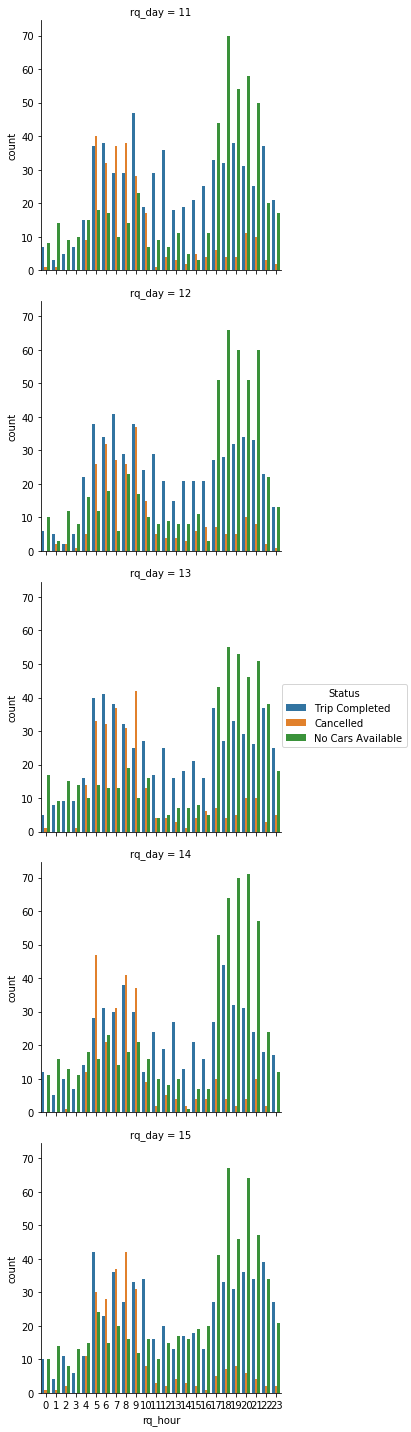

In [24]:
# factor plot of hour and day w.r.t. status
sns.factorplot(x = "rq_hour", hue = "Status", row = "rq_day", data = uber_df, kind = "count")

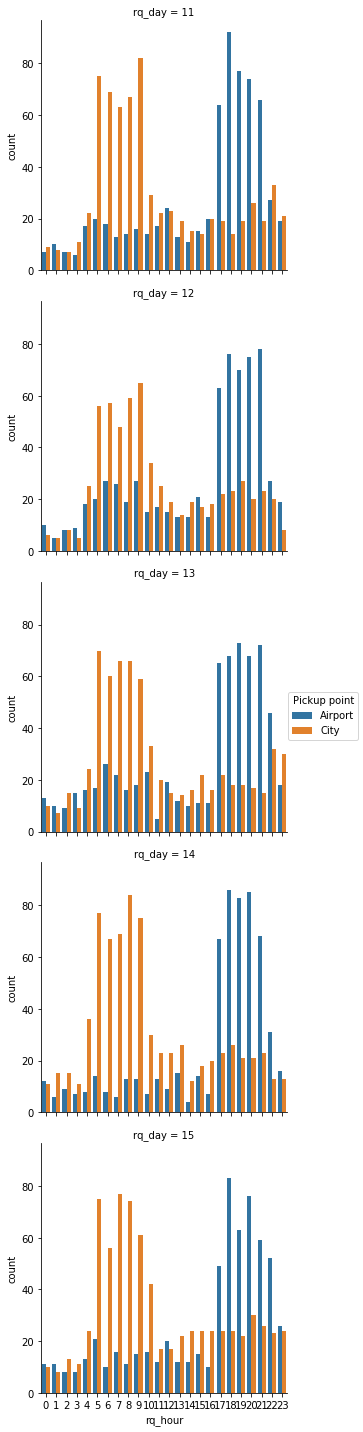

In [25]:
# factor plot of hour and day w.r.t. status
sns.factorplot(x = "rq_hour", hue = "Pickup point", row = "rq_day", data = uber_df, kind = "count")

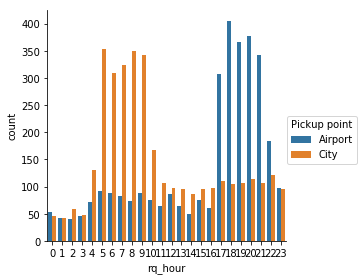

In [26]:
# Aggregate count plot for all days w.r.t to Pickup point
sns.factorplot(x = "rq_hour", hue = "Pickup point", data = uber_df, kind = "count")

In [27]:
# creating a time slot for various time period of 
def time_period(x):
    'divide day time into 4 categories'
    if x<5:
        return "Pre Morning"
    elif 5 <= x < 10:
        return "Morning Rush"
    elif 10 <= x < 17:
        return "Day_Time"
    elif 17 <= x < 22:
        return "Evening_Rush"
    else:
        return "Late_Night"
    
uber_df["time_slot"] = uber_df.rq_hour.apply(lambda x: time_period(x))

In [28]:
uber_df.time_slot.value_counts()

Evening_Rush    2342
Morning Rush    2103
Day_Time        1224
Pre Morning      578
Late_Night       498
Name: time_slot, dtype: int64

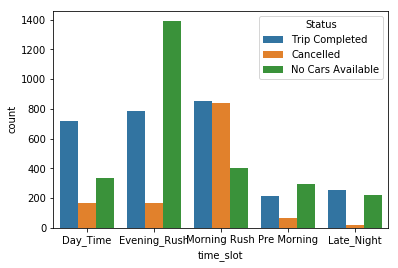

In [29]:
# plot time slot w.r.t. status and identify the most critical problems before Uber
sns.countplot(x = "time_slot", hue = "Status", data = uber_df)

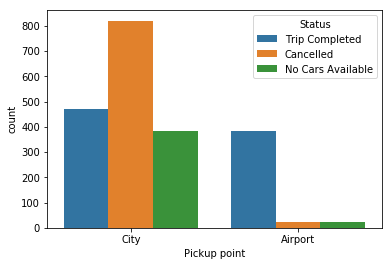

In [30]:
# as you can see in the above plot the higest number of cancellations are in the "Morning Rush" time slot
uber_df_morning_rush = uber_df[uber_df.time_slot == "Morning Rush"]
sns.countplot(x="Pickup point", hue="Status", data = uber_df_morning_rush)

In [31]:
# severity of problem by location and their count (cancellation of cab as per the pickup location @Morning Rush)
uber_df_morning_cancelled = uber_df_morning_rush.loc[(uber_df_morning_rush["Pickup point"] == "City") & (uber_df_morning_rush["Status"] == "Cancelled")]
len(uber_df_morning_cancelled.index)

820

In [32]:
uber_df_morning_cancelled = uber_df_morning_rush.loc[(uber_df_morning_rush["Pickup point"] == "Airport") & (uber_df_morning_rush["Status"] == "Cancelled")]
len(uber_df_morning_cancelled.index)

23

In [33]:
# supply & demand in morning rush hours in city
uber_df_completed_morning_rush = uber_df_morning_rush.loc[(uber_df_morning_rush["Pickup point"] == "City") & (uber_df_morning_rush["Status"] == "Trip Completed")]
len(uber_df_completed_morning_rush.index)

472

In [34]:
uber_df_city_morning_rush = uber_df_morning_rush.loc[(uber_df_morning_rush["Pickup point"] == "City")]
len(uber_df_city_morning_rush.index)

1677

In [35]:
# supply & demand in morning rush hours in Airport
uber_df_airport_completed_morning_rush = uber_df_morning_rush.loc[(uber_df_morning_rush["Pickup point"] == "Airport") & (uber_df_morning_rush["Status"] == "Trip Completed")]
len(uber_df_airport_completed_morning_rush.index)

382

In [36]:
uber_df_airport_morning_rush = uber_df_morning_rush.loc[(uber_df_morning_rush["Pickup point"] == "Airport")]
len(uber_df_airport_morning_rush.index)

426

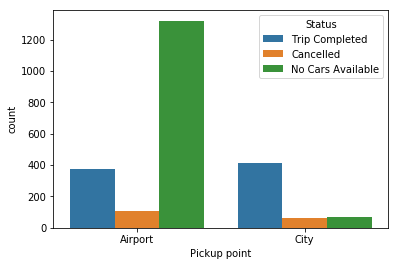

In [37]:
# supply & demand in evening rush hour
uber_df_evening_rush = uber_df[uber_df.time_slot == "Evening_Rush"]
sns.countplot(x = "Pickup point", hue = "Status", data = uber_df_evening_rush)

In [38]:
# supply and demand in evening rush hour in the city
uber_df_city_completed_evening_rush = uber_df_evening_rush.loc[(uber_df_evening_rush["Pickup point"] == "City") & (uber_df_evening_rush["Status"] == "Trip Completed")]
len(uber_df_city_completed_evening_rush.index)

411

In [39]:
uber_df_city_evening_rush  = uber_df_evening_rush.loc[(uber_df_evening_rush["Pickup point"] == "City")]
len(uber_df_city_evening_rush.index)

542

In [40]:
# supply and demand in evening rush hour from the airport
uber_df_airport_completed_evening_rush = uber_df_evening_rush.loc[(uber_df_evening_rush["Pickup point"] == "Airport") & (uber_df_evening_rush["Status"] == "Trip Completed")]
len(uber_df_airport_completed_evening_rush.index)

373

In [41]:
uber_df_airport_evening_rush  = uber_df_evening_rush.loc[(uber_df_evening_rush["Pickup point"] == "Airport")]
len(uber_df_airport_evening_rush.index)

1800

In [42]:
# severity problem (of demand and supply) at each location by looking at cancellation of cab in each of the pickup location in evening rush
uber_df_airport_cancelled_evening_rush  = uber_df_evening_rush.loc[(uber_df_evening_rush["Pickup point"] == "Airport") & (uber_df_evening_rush["Status"] == "Cancelled")]
len(uber_df_airport_cancelled_evening_rush.index)

106

In [43]:
uber_df_airport_cancelled_evening_rush  = uber_df_evening_rush.loc[(uber_df_evening_rush["Pickup point"] == "City") & (uber_df_evening_rush["Status"] == "Cancelled")]
len(uber_df_airport_cancelled_evening_rush.index)

60

In [44]:
# severity of problem by location in Morning Rush (Unavailability of Cars)
uber_df_airport_unavailable_morning_rush  = uber_df_morning_rush.loc[(uber_df_morning_rush["Pickup point"] == "Airport") & (uber_df_morning_rush["Status"] == "No Cars Available")]
len(uber_df_airport_unavailable_morning_rush.index)

21

In [45]:
uber_df_airport_unavailable_morning_rush  = uber_df_morning_rush.loc[(uber_df_morning_rush["Pickup point"] == "City") & (uber_df_morning_rush["Status"] == "No Cars Available")]
len(uber_df_airport_unavailable_morning_rush.index)

385

In [46]:
# severity of problem by location in Evening Rush (Unavailability of Cars)
uber_df_airport_unavailable_evening_rush  = uber_df_evening_rush.loc[(uber_df_evening_rush["Pickup point"] == "Airport") & (uber_df_evening_rush["Status"] == "No Cars Available")]
len(uber_df_airport_unavailable_evening_rush.index)

1321

In [47]:
uber_df_airport_unavailable_evening_rush  = uber_df_evening_rush.loc[(uber_df_evening_rush["Pickup point"] == "City") & (uber_df_evening_rush["Status"] == "No Cars Available")]
len(uber_df_airport_unavailable_evening_rush.index)

71

In [48]:
# create pie charts instead of a count plots
def pie_chart(dataframe):
    """
    creates a pie chart
    input: dataframe with a 'category' as index and a numerical column
    output: pie chart
    """
    labels = dataframe.index.values
    sizes = dataframe['Status'].values
        
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

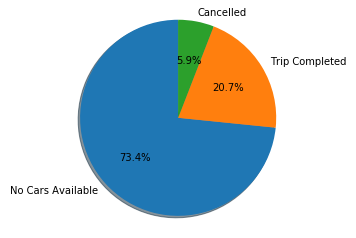

In [49]:
# Status of trips @ Evening Rush where pickup point is Airport
uber_df_airport = uber_df.loc[(uber_df["Pickup point"] == "Airport") & (uber_df.time_slot == "Evening_Rush")] 
uber_df_airport_count = pd.DataFrame(uber_df_airport.Status.value_counts())
pie_chart(uber_df_airport_count)

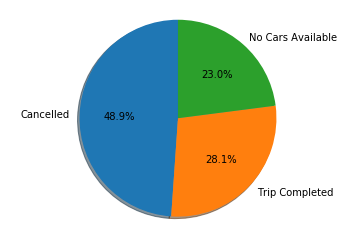

In [50]:
# % breakup of status on the basis of the pickup location
# Status of trips @ Morning Rush where pickup point is City
uber_df_city = uber_df.loc[(uber_df["Pickup point"] == "City") & (uber_df.time_slot == "Morning Rush")]
uber_df_city_count = pd.DataFrame(uber_df_city.Status.value_counts())
pie_chart(uber_df_city_count)